In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
Y = df[['Drug']].values

In [6]:
# CHANGE CATEGORICAL VALUES
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
le.fit(['F','M'])
X[:,1] = le.transform(X[:,1])
X[:10,1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=object)

In [8]:
le.fit(['HIGH','LOW','NORMAL'])
X[:,2] = le.transform(X[:,2])
X[:10,2]

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1], dtype=object)

In [9]:
le.fit(['HIGH','NORMAL'])
X[:,3] = le.transform(X[:,3])
X[:10,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object)

In [10]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [11]:
train_x, test_x , train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=3)

In [12]:
print ('Train set:', train_x.shape,  train_y.shape)
print ('Test set:', test_x.shape,  test_y.shape)

Train set: (140, 5) (140, 1)
Test set: (60, 5) (60, 1)


In [13]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [14]:
drugtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [15]:
drugtree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
test_yhat = drugtree.predict(test_x)

In [17]:
# EVALUATION
from sklearn import metrics

In [18]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, test_yhat))

DecisionTrees's Accuracy:  0.9833333333333333


In [19]:
# Visualization 
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

C:\Users\victo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<Figure size 432x288 with 0 Axes>

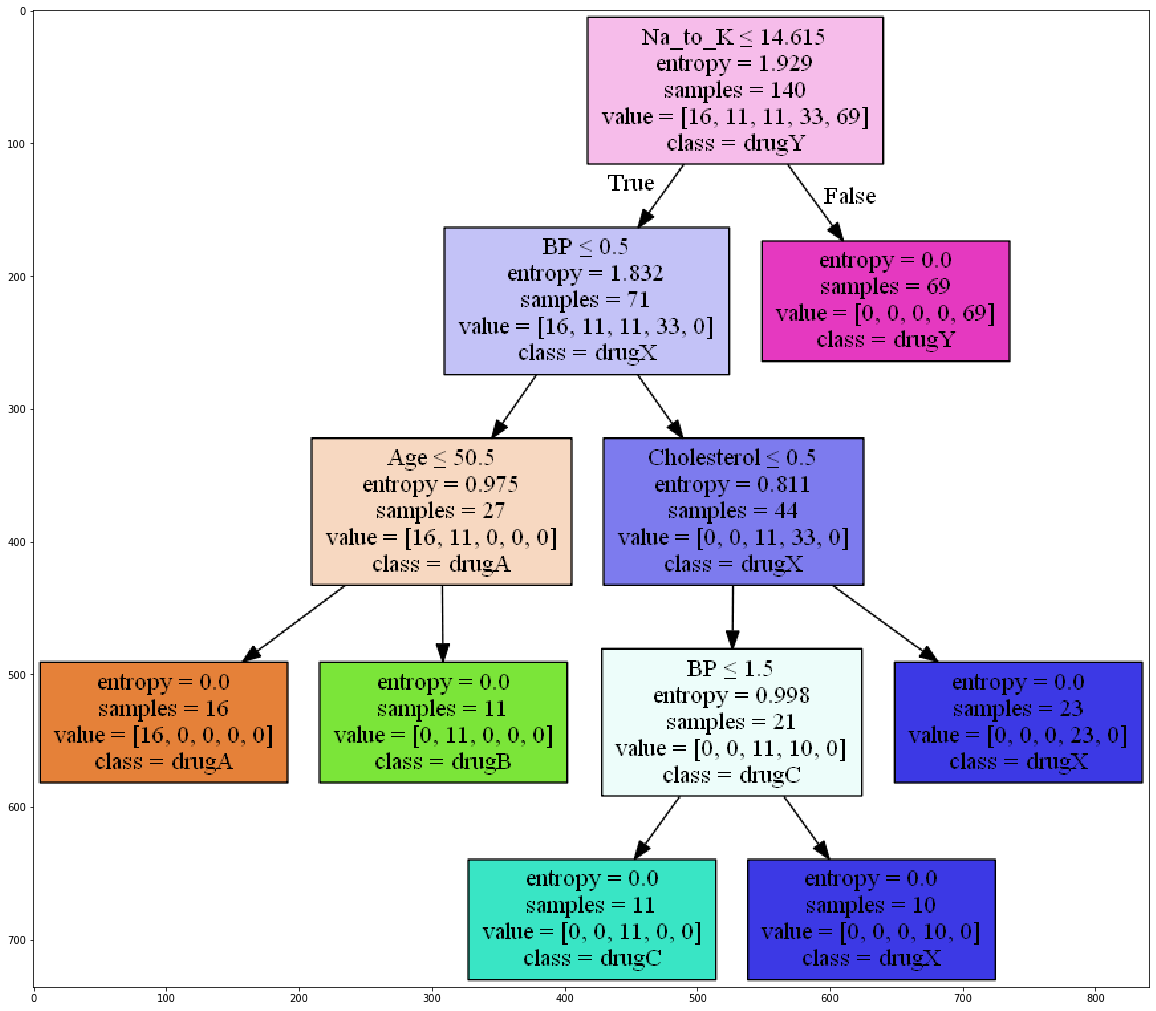

In [20]:
dot_data = StringIO()
plt.clf()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(train_y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')